## FEATURE PROCESSING
In this section we will process the features of the dataset. This includes doing any feature engineering and
transformations being applied to the data. All of this is done after loading in the cleaned version of the data.


In [21]:
import pandas as pd
clean_path = 'credit_card_transactions_clean.csv'
df = pd.read_csv(clean_path)
# print("Loaded", df.shape, "rows × columns")
df.head(20)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_outlier
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0


### SEPERATING DATE TIME 
For each transction-date-time we will seperate into hour, weekday, and month
This will help later in anomaly detection and clustering user behaviour based on time of day, day of week, and month.

In [22]:
df['trans_dt'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour']     = df['trans_dt'].dt.hour
df['weekday']  = df['trans_dt'].dt.weekday
df['month']    = df['trans_dt'].dt.month

In [23]:
df.drop(columns=['trans_date_trans_time'], inplace=True)
df.head(10)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_outlier,trans_dt,hour,weekday,month
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2019-01-01 00:00:18,0,1,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2019-01-01 00:00:44,0,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2019-01-01 00:00:51,0,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2019-01-01 00:01:16,0,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2019-01-01 00:03:06,0,1,1
5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,...,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0,2019-01-01 00:04:08,0,1,1
6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,...,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0,2019-01-01 00:04:42,0,1,1
7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,...,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0,2019-01-01 00:05:08,0,1,1
8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,...,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0,2019-01-01 00:05:18,0,1,1
9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,...,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0,2019-01-01 00:06:01,0,1,1


# EDA/FEATURE ENGINEERING FOR GUIDING QUESTION 1: 

## How to build  a reliable time series forecasting model to predict future credit card spending, at both individual and aggregate levels, based on historical behaviours?

Since there are multiple transactions the intuition is to see how many unique cards across the total numbers of transactions

In [24]:
# How many unique cards?
n_cards = df['cc_num'].nunique()

# How many total rows?
n_rows = len(df)

print(f"{n_cards:,} unique cards across {n_rows:,} transactions "
      f"(≈ {n_rows/n_cards:.1f} txns/card on average)")

983 unique cards across 1,296,675 transactions (≈ 1319.1 txns/card on average)


## Interpret the “Txns per Card” figure
983 unique cards means we truly have about a thousand distinct “users” (cards).

1.3 million transactions spread across them gives an average of 1,319 transactions per card.

In reality, some cards will be used far more often than others—so the distribution of transactions per card is almost certainly skewed (long right tail).



## Transactions Per Card

In [25]:
txns_per_card = df.groupby('cc_num')['amt'].count().rename('txn_count')
print(txns_per_card)
txns_per_card.describe().apply(lambda x: f"{x:.0f}")

cc_num
60416207185            1518
60422928733            1531
60423098130             510
60427851591             528
60487002085             496
                       ... 
4958589671582726883    1476
4973530368125489546    1040
4980323467523543940     532
4989847570577635369    1007
4992346398065154184    2059
Name: txn_count, Length: 983, dtype: int64


count     983
mean     1319
std       812
min         7
25%       525
50%      1054
75%      2025
max      3123
Name: txn_count, dtype: object

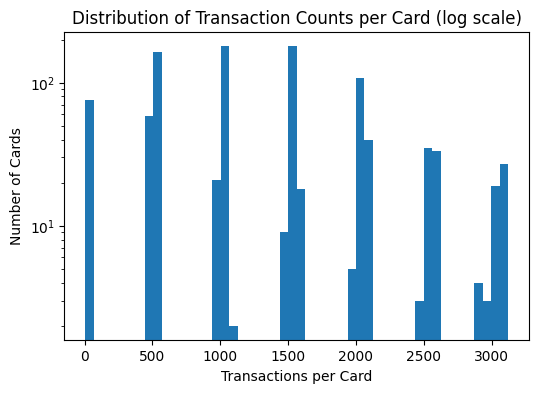

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(txns_per_card, bins=50, log=True)
plt.xlabel('Transactions per Card')
plt.ylabel('Number of Cards')
plt.title('Distribution of Transaction Counts per Card (log scale)')
plt.show()

Heavy right‐skew

Most cards fall into the 500–2 000 transactions range (the tallest bars).

A small number of cards have over 2 500 txns, stretching the tail out to ~3 200.

Long tail

On the log-y axis you can still see bins with only 10–20 cards up in the 2 500–3 000 range, whereas the peak bins contain 100–200 cards.

Wide variation

The 25th/75th percentile range (from ~740 to ~1 850 txns) covers most cards, but the maximum (≳3 000) shows a handful of “power” users well above that.

Why the log scale helps

Without it, the small‐count bins at the high end would be nearly invisible beside the ~100-card peak bins.

In [27]:
# Define segments by quartiles
segments = pd.qcut(txns_per_card, 
                   q=[0, .25, .75, 1], 
                   labels=['light','medium','heavy'])
segments.value_counts()

txn_count
medium    488
light     250
heavy     245
Name: count, dtype: int64

Turn the segments into features
- target encode the segments 0 = light, 1 = medium, 2 = heavy
- Forecasting: Heavy users contribute most of the volume; you may need separate forecasting models or seasonality parameters for heavy‐user cohorts.

Feature: The segment code (0/1/2) can be an exogenous regressor in Prophet/ARIMA or a feature in per‐card RNNs

In [28]:
per_card = pd.DataFrame({'txn_count': txns_per_card, 'segment': segments})
per_card['seg_code'] = per_card['segment'].map({'light':0,'medium':1,'heavy':2})
df = df.join(per_card[['segment','seg_code']], on='cc_num')
print(df)


                      cc_num                             merchant  \
0           2703186189652095           fraud_Rippin, Kub and Mann   
1               630423337322      fraud_Heller, Gutmann and Zieme   
2             38859492057661                 fraud_Lind-Buckridge   
3           3534093764340240   fraud_Kutch, Hermiston and Farrell   
4            375534208663984                  fraud_Keeling-Crist   
...                      ...                                  ...   
1296670       30263540414123                    fraud_Reichel Inc   
1296671     6011149206456997             fraud_Abernathy and Sons   
1296672     3514865930894695                 fraud_Stiedemann Ltd   
1296673     2720012583106919  fraud_Reinger, Weissnat and Strosin   
1296674  4292902571056973207  fraud_Langosh, Wintheiser and Hyatt   

              category     amt        first       last gender  \
0             misc_net    4.97     Jennifer      Banks      F   
1          grocery_pos  107.23    Stephan

In [29]:
per_card = (
  df.groupby('cc_num')
    .agg(
      txn_count    = ('amt','count'),
      total_spend  = ('amt','sum'),
      mean_spend   = ('amt','mean'),
      std_spend    = ('amt','std'),
      first_txn    = ('trans_dt','min'),
      last_txn     = ('trans_dt','max'),
      fraud_rate   = ('is_fraud','mean')
    )
    .fillna(0)
    .assign(days_active = lambda d: (d['last_txn'] - d['first_txn']).dt.days + 1,
            spend_per_day = lambda d: d['total_spend'] / d['days_active'])
)


In [30]:
print(per_card)

                     txn_count  total_spend  mean_spend    std_spend  \
cc_num                                                                 
60416207185               1518     85043.47   56.023366   122.632635   
60422928733               1531    105640.20   69.000784   102.681962   
60423098130                510     58673.63  115.046333  1202.988005   
60427851591                528     59129.61  111.987898   143.310653   
60487002085                496     25160.11   50.726028    65.843969   
...                        ...          ...         ...          ...   
4958589671582726883       1476     97973.69   66.377839   151.649600   
4973530368125489546       1040     81508.22   78.373288   299.269322   
4980323467523543940        532     39600.18   74.436429   130.051516   
4989847570577635369       1007     88195.62   87.582542   122.908864   
4992346398065154184       2059    139690.45   67.843832   157.223610   

                              first_txn            last_txn  fr

1.1 Compute Volume & Amount by Category

In [18]:
# 1) Count (# of txns) per category
volume_by_cat = df['category'].value_counts().rename('txn_count')

# 2) Sum ($ spent) per category
amount_by_cat = df.groupby('category')['amt'].sum().sort_values(ascending=False).rename('total_amt')

# 3) Combine into one table
cat_summary = (
    pd.concat([volume_by_cat, amount_by_cat], axis=1)
      .assign(avg_amt=lambda d: d['total_amt'] / d['txn_count'])
)

print(cat_summary)

                txn_count    total_amt     avg_amt
category                                          
gas_transport      131659   8351732.29   63.434572
grocery_pos        123638  14460822.38  116.960986
home               123115   7173928.11   58.270139
shopping_pos       116672   9307993.61   79.779155
kids_pets          113035   6503680.16   57.536871
shopping_net        97543   8625149.68   88.424076
entertainment       94014   6036678.56   64.210421
food_dining         91461   4672459.44   51.086905
personal_care       90758   4353450.53   47.967678
health_fitness      85879   4653108.02   54.182140
misc_pos            79655   5009582.50   62.890999
misc_net            63287   5117709.26   80.865095
grocery_net         45452   2439412.68   53.670084
travel              40507   4516721.68  111.504720
